#MARIANA URBINA
#CECILIA ZALDIVAR

In [37]:
#importar libreria pandas y seaborn para manejar dataframes y graficas
import pandas as pd
import seaborn as sns

In [38]:
#lectura de dataframe
data = pd.read_csv('top50.csv', encoding='ISO-8859-1')
data

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [39]:
data.groupby("Unnamed: 0")[["Danceability"]].mean()

,Danceability
Unnamed: 0,
1,76.0
2,79.0
3,40.0
4,64.0
5,58.0
6,80.0
7,75.0
8,48.0
9,88.0


## PRIMERA PARTE

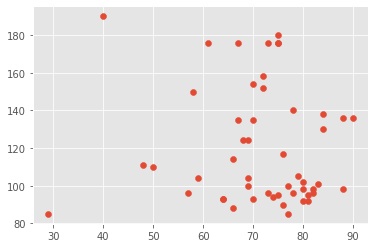

In [40]:
import matplotlib.pyplot as plt
#tomamos la variable danceability como variable x, y beats per minute como variable y, que es la variable responsiva
x = [76,79,40,64,58,80,75,48,88,70,61,82,50,73,83,70,75,76,84,72,68,70,81,80,67,69,82,73,74,64,29,78,78,80,77,66,75,72,84,81,69,77,57,90,88,66,67,69,59,75]
y = [117, 105, 190, 93, 150, 102, 180, 111, 136, 135, 176, 96, 110, 176, 101, 93, 176, 90, 130, 158, 124, 154, 92, 92, 135, 124, 98, 96, 94, 93, 85, 140, 96, 98, 100, 114, 176, 152, 138, 95, 104, 85, 96, 136, 98, 88, 176, 100, 104, 95]

plt.scatter(x, y)
plt.show()

In [41]:
import numpy as np
barx = np.mean(x)
bary = np.mean(y)
#es la varianza muestral
print(barx, bary)

71.38 120.06


In [42]:
varx = np.var(x, ddof=1) #la varianza muestral, ddof=1 es predeterminado por la formula que vimos
covxy = np.cov(x,y, ddof=1) #la covarianza muestral

print(varx, covxy)

142.32204081632653 [[142.32204082 -34.71714286]
 [-34.71714286 954.71061224]]


In [43]:
print(varx)

142.32204081632653


In [44]:
covxy = covxy[0,1]
covxy

-34.71714285714287

In [45]:
beta1 = covxy/varx
beta0 = bary-beta1*barx
#beta0 es el intercepto y el 1 es la pendiente que es negativa, los puntos tienen tendencia negativa
#nuestra recta de regresión para esos datos quedaría --> y = 137.47 - 0.24 x
print(beta0, beta1)

137.47198793193937 -0.24393370596720867


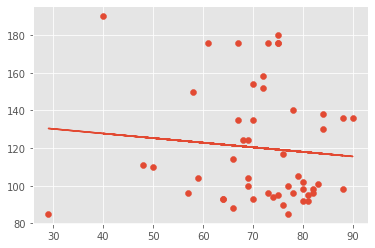

In [46]:
import matplotlib.pyplot as plt
from scipy import stats


slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x)) 

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [47]:
slope, intercept

(-0.2439337059672087, 137.47198793193937)

In [48]:
r

-0.09418289163246003

In [49]:
#dado un valor de 53 en danceability, se hace una predicción para la variable de beats per minute y el resultado es 124.54 
s = myfunc(53)
s

124.5435015156773

## SEGUNDA PARTE

In [50]:
from operator import length_hint
import pandas as pd
from statsmodels.formula.api import ols

Danceability = [76,79,40,64,58,80,75,48,88,70,61,82,50,73,83,70,75,76,84,72,68,70,81,80,67,69,82,73,74,64,29,78,78,80,77,66,75,72,84,81,69,77,57,90,88,66,67,69,59,75]
Beats_Per_Minute  = [117, 105, 190, 93, 150, 102, 180, 111, 136, 135, 176, 96, 110, 176, 101, 93, 176, 90, 130, 158, 124, 154, 92, 92, 135, 124, 98, 96, 94, 93, 85, 140, 96, 98, 100, 114, 176, 152, 138, 95, 104, 85, 96, 136, 98, 88, 176, 100, 104, 95]
Popularity = [79, 92, 85, 86, 94, 84, 92, 90, 87, 95, 93, 86, 88, 87, 92, 82, 90, 91, 88, 91, 91, 91, 83, 91, 89, 70, 83, 89, 91, 89, 84, 89, 89, 89, 89, 89, 91, 87, 80, 78, 88, 90, 87, 84, 88, 88, 88, 88, 88, 82]
Length= [191,302,186,198,175,220,131,202,157,194,251,185,182,288,205,261,243,158,161,173,153,115,309,266,195,191,210,213,193,222,210,179,176,200,224,164,226,162,181,199,228,171,216,198,162,182,202,214,218, 206]

df = pd.DataFrame( {"Danceability": Danceability, "Beats_Per_Minute": Beats_Per_Minute, "Popularity": Popularity, "Length":Length})
print(df)

    Danceability  Beats_Per_Minute  Popularity  Length
0             76               117          79     191
1             79               105          92     302
2             40               190          85     186
3             64                93          86     198
4             58               150          94     175
5             80               102          84     220
6             75               180          92     131
7             48               111          90     202
8             88               136          87     157
9             70               135          95     194
10            61               176          93     251
11            82                96          86     185
12            50               110          88     182
13            73               176          87     288
14            83               101          92     205
15            70                93          82     261
16            75               176          90     243
17        

In [52]:
#Despues de que los datos que usaremos estan en un dataframe, obtenemos la estimación de los coeficientes haciendo fit y usando el método de mínimos cuadrados
#nuestra r cuadrara es =1 
#con estas variables para la formula OLS encontramos la mejor r cuadrada
Reg = ols(formula = "Danceability ~ Beats_Per_Minute + Popularity + Danceability*Popularity ", data = df)
Fit = Reg.fit() 
Fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Danceability   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.515e+30
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:45:42   Log-Likelihood:                 1495.1
No. Observations:                  50   AIC:                            -2980.
Df Residuals:                      45   BIC:                            -2971.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4.832e-13   6.34e-13     -0.762      0.450   -1.76e-12    7.94e-13
Beats_Per_Minute         1.388e-16   1.26e-16      1.105      0.275   -1.14e-16    3.92e-16
Popularity               4.663e-15   7.36e-15      0.633      0.530   -1.02e-14    1.95e-14
Danceability                1.0000   8.73e-15   1.15e+14      0.000       1.000       1.000
Danceability:Popularity -1.214e-16   1.01e-16     -1.201      0.236   -3.25e-16    8.23e-17
==============================================================================
Omnibus:                        8.236   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.643
Skew:                          -0.936   Prob(JB):                       0.0219
Kurtosis:                       3.408   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Danceability = 1 + 1.38 BeatsPerMinute + 4.63 Popularity -1.21 Danceability*Popularity